Text(0.5, 1.0, 'Value')

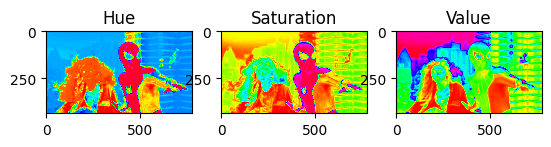

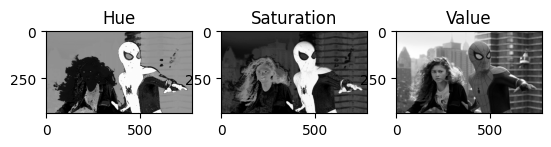

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('spider.png', cv.IMREAD_COLOR)
imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgh = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h_img, s_img , v_img = cv.split(imgh)

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap='hsv')
ax[2].set_title('Value')

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap='gray')
ax[2].set_title('Value')





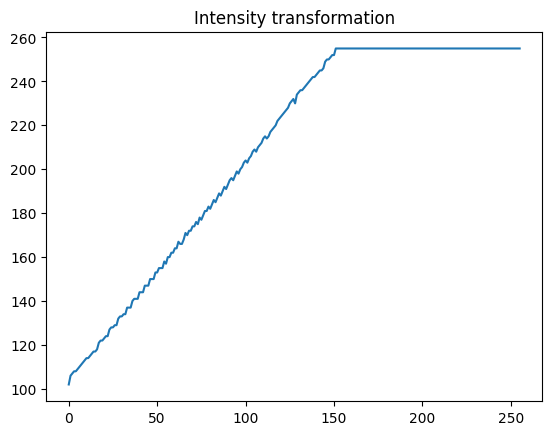

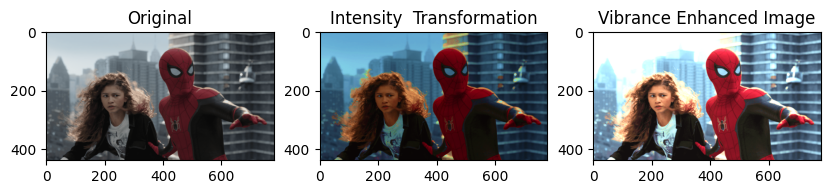

In [30]:

x= np.arange(0, 256).astype('uint8')
a = 0.8
sigma = 70
Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255).astype('uint8')
image_transform = cv.LUT(s_img, Y)


plt.title('Intensity transformation')
plt.plot(Y)



plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
newHSV1 = cv.cvtColor(result, cv.COLOR_BGR2RGB)
added_img = cv.add(newHSV1, imgc)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imgc)
ax[0].set_title('Original')
ax[1].imshow(newHSV1)
ax[1].set_title('Intensity  Transformation')
ax[2].imshow(added_img)
ax[2].set_title('Vibrance Enhanced Image')
plt.show()

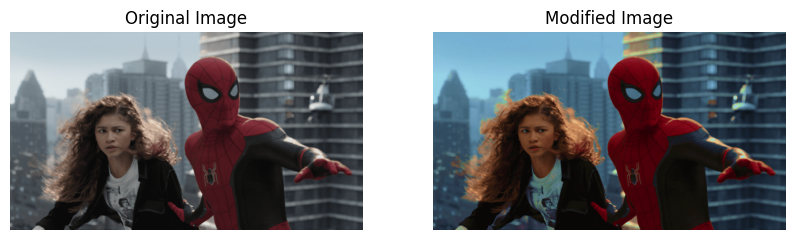

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, sigma):
    return np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255)
image = cv.imread("spider.png")

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
saturation_plane = hsv_image[:, :, 1]

a = 0.6 
sigma = 70

modified_saturation = f(saturation_plane, a, sigma)

hsv_image[:, :, 1] = modified_saturation.astype(np.uint8)
modified_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Modified Image')
ax[1].axis('off')
plt.show()

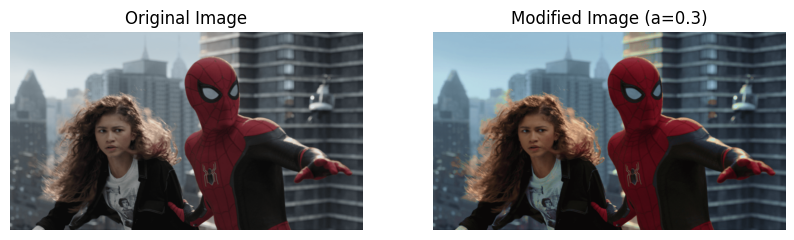

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, sigma):
    return np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255)

image = cv.imread("spider.png")

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
saturation_plane = hsv_image[:, :, 1]

a = 0.3
sigma = 70

modified_saturation = f(saturation_plane, a, sigma)

hsv_image[:, :, 1] = modified_saturation.astype(np.uint8)
modified_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Modified Image (a={a})')
ax[1].axis('off')
plt.show()

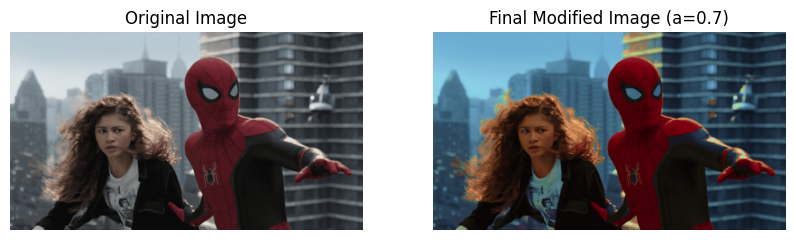

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, sigma):
    return np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255)
image = cv.imread("spider.png")

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

a = 0.7 
sigma = 70

modified_saturation = f(saturation_plane, a, sigma)

hsv_image[:, :, 1] = modified_saturation.astype(np.uint8)
modified_image = cv.merge([hue_plane, hsv_image[:, :, 1], value_plane])
final_modified_image = cv.cvtColor(modified_image, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(final_modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title(f'Final Modified Image (a={a})')
ax[1].axis('off')
plt.show()